This notebook features the post-run data analysis conducted on predictions generated by the eSNLI pre-trained model, specifically in the context of cosine similarity between Premise and Hypothesis.

In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("./post-run_esnli_test_cos_sim_data.csv")

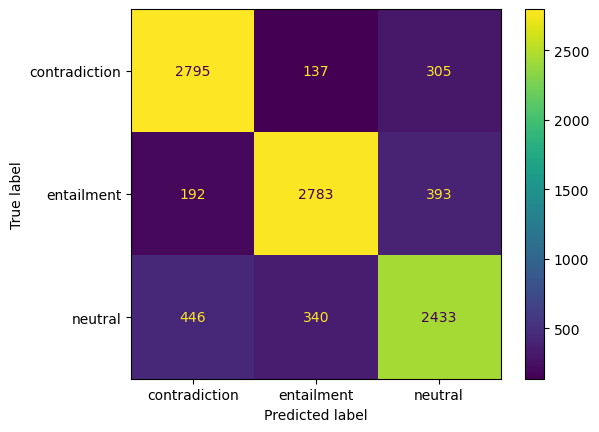

In [3]:
actual = df["gold_label"].tolist()
predicted = df["pred_label"].tolist()

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["contradiction", "entailment", "neutral"])
cm_display.plot()
plt.show()

Consider the case when the predicted label is neutral but the true label is not

In [4]:
neutral_to_entailment = df[(df["gold_label"] == "neutral") & (df["pred_label"] == "entailment")]
contradiction_to_entailment = df[(df["gold_label"] == "contradiction") & (df["pred_label"] == "entailment")]
# count the number of neutral_to_entailment and contradiction_to_entailment
print("neutral_to_entailment: ", len(neutral_to_entailment))
print("contradiction_to_entailment: ", len(contradiction_to_entailment))

neutral_to_entailment:  340
contradiction_to_entailment:  137


In [7]:
# sort the neutral_to_entailment and contradiction_to_entailment by cos_sim
neutral_to_entailment = neutral_to_entailment.sort_values(by = "cosine_similarity", ascending = False)
contradiction_to_entailment = contradiction_to_entailment.sort_values(by = "cosine_similarity", ascending = False)

In [8]:
neutral_to_entailment.head(30)

,gold_label,Premise,Hypothesis,pred_label,pred_expl,Expl_1,Expl_2,Expl_3,cosine_similarity
177,neutral,a boy holding onto the wall of an old brick house 's raised foundation .,a boy holding onto the wall of an old brick house 's raised foundation as construction occurs,entailment,the boy is holding onto the wall of an old brick house 's raised foundation .,a boy can hold onto the foundation regardless of whether construction is occurring .,a boy holding onto the wall does not mean there is construction taking place .,just because the house is old and the foundation is raised does not mean that construction is occurring .,0.958175
3381,neutral,A man laughing while at a restaurant .,A man laughing while at a restaurant eating .,entailment,a man laughing while at a restaurant is eating .,by the statement that a man laughing while at a restaurant does n't imply he is eating .,just because a man laughing while at a restaurant does not mean they are eating .,a man can be at a restaurant without eating .,0.950528
2628,neutral,people standing at a beach with Cameras .,A group of people standing at a beach filled with cameras .,entailment,people are standing at a beach with cameras is same as group of people standing at a beach filled with cameras,"normally there would only be a few cameras , it 's not normal for a beach to be filled with cameras",the beach may not be filled with cameras,people standing at the beach does n't necessarily have to in a group .,0.947771
2627,neutral,people standing at a beach with Cameras .,People standing at a beach being filmed by cameras .,entailment,people are standing at a beach with cameras is same as people are standing at a beach,there being cameras does not necessarily mean the people are being filmed by cameras .,it say 's that the people are standing with cameras not being filmed by cameras .,people being filmed by cameras do not always have cameras themselves .,0.945131
183,neutral,Six dogs swimming in a river .,Six dogs swim across the river .,entailment,swimming in a river is the same as across across the river .,just because the dogs are swimming in a river does not mean they swim across the river .,just they swam in the river does not mean they swam across the river .,just because they are swimming in the river does not mean they are going across the river .,0.934258
5359,neutral,Group of Asians recording some video .,A group of Asians record multiple videos .,entailment,a group of asians recording multiple video is same as asians record multiple video,some video does not imply multiple videos .,we have no idea if they record multiple videos or just one .,some video does n't imply recording multiple videos .,0.932852
4767,neutral,Three guys in red uniforms celebrating a goal in a soccer game .,Three men in red uniforms celebrating a goal at a soccer game outside .,entailment,the guys are men ; soccer is played outside .,a soccer game may occur both inside and outside .,just because men are celebrating a goal it does not mean the game is outside .,the soccer game is does not have to be outside .,0.927071
211,neutral,This child is on the library steps .,The child is on the steps inside the library .,entailment,the child steps on the steps inside the library .,you can not infer the child is in the library .,it does not specify if the child is on the steps inside or outside .,steps could be inside or outside,0.919243
1455,neutral,Two men and a Frisbee,Two men playing with a Frisbee .,entailment,men with a frisbee are playing with it .,"two men could be holding the frisbee or showing off the frisbee , rather than playing with it",the men might not be playing with the frisbee,there are many actions that can occur with a frisbee and playing with it is only one of them .,0.916033
4322,neutral,A gas station and a car on fire .,A car sets a gas station on fire .,entailment,a gas station and a car on fire is the same as a car sets a gas station on fire .,just because a car and gas station is on fire d

In [9]:
contradiction_to_entailment.head(30)

,gold_label,Premise,Hypothesis,pred_label,pred_expl,Expl_1,Expl_2,Expl_3,cosine_similarity
5593,contradiction,A performer plays an instrument for the audience .,The instrument plays a performer for an audience .,entailment,a performer plays an instrument for the audience .,"if the performer plays an instrument , the instrument can not play the performer at the same time .",only the performer can play an instrument,"a performer is a human being , an instrument is not a living creature ; it must be played by a performer to work .",0.976835
1263,contradiction,A man is watching as a woman is reading a piece of paper .,A woman watches as a man reads a paper .,entailment,a man is reading as a woman is reading a piece of paper .,a man is not a woman and a woman is not a man .,either man or the woman is watching .,a man watching woman reading paper is opposite to a woman watching man reading paper .,0.950701
9306,contradiction,An elderly male is blowing air into an object .,The elderly man gave up blowing air into the object,entailment,an elderly man is blowing an air balloon,if he gave up how can he be blowing air .,the man could n't have gave up blowing air at the same time he is blowing air .,the man can not be blowing air while he gave up blowing air simultaneously .,0.885599
5551,contradiction,A four piece band plays a song on a medium-size stage .,A three piece band plays a song on a medium-size stage .,entailment,a four piece band plays a song on a large stage .,a three piece band can not also be a four piece band .,the four piece band is mentioned first then a three piece,there is either three or four pieces .,0.884371
8719,contradiction,Politician John McCain on a talk show .,John McCain is hosting a talk show .,entailment,george john is a type of john .,"either he is hosting a talk show or is a guest on a talk show , he ca n't do both",on a talk show implies that john is a guest and not hosing a talk show .,john ca n't be hosting show if he is on the show,0.873545
6677,contradiction,A man pushing a hand-truck of boxes is bending over to pick up a pear .,A man is pushing a pear and picking up boxes .,entailment,a man pushing a pile of boxes is bending over to pick up a pear .,"the man is either pushing boxes and picking up a pear , or he is picking up boxes and pushing a pear .","a man is either pushing boxes and picking up a pear , or is pushing a pear and picking up boxes ; both can not be done at the same time .",he is either pushing the pear or the boxes .,0.863995
9639,contradiction,A child being watched while getting something out of a tank .,The tank is getting something out of the child .,entailment,a tank being carried is the same as the child is getting something out of the child .,the child can not be getting something out of a tank while a tank is taking something out of the child .,only the child can get something out of the tank,"a tank is not a living creature , but the child is .",0.852542
2881,contradiction,"There are two kilted men , one of them older and is holding bagpipes with the other one with a drum .",Two kiled men hold bagpipes,entailment,two men are holding bagpipes with the drums .,either one is holding bagpipes or two hold bagpipes,the second man can either be holding bagpipes or a drum .,there ca n't be two men with bagpipes when one is holding bagpipes and one with drums .,0.849708
3195,contradiction,A man holds a rope for a boy who 's about to climb a wall .,There is a man climbing as the boy holds the rope,entailment,holds a rope is a rephrasing of climbing .,it can not be both a boy and also a man who is climbing,a man can not be holding the rope while the boy holds the rope ; a man can not be climbing while a boy is about to climb .,boy climbing is different from man climbing .,0.826135
1963,contradiction,People looking at their reflection and the reflection of a city in a long irregular shaped mirror,People look their reflection in a regular mirror .,entailment,people looking at reflection 

END